# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Tonny | Chuwa | Tonny Chuwa, 27/11/2024 | 9 Hours | 25% |
| Member 2: | Gagan | Kataria | Gagan Kataria, 27/11/2024 | 8 Hours | 25% |
| Member 3: | Augustine | Ikechukwu | Augustine Ikechukwu Ojumah, 27/11/2024 | 8 Hours | 25% |
| Member 4: | Abraham | Tesfamichael | Abraham Yihdego Tesfamichael, 27/11/2024 | 8 Hours | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [2]:
# some library imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe
from google.colab import drive
drive.mount('/content/drive')
# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [6]:
# TODO: Display first two rows of cv_set
# (1 mark)
cv_set.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [7]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [8]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [9]:
# TODO: Display all columns in cv_set
# (1 mark)
cv_set.columns

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')

In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [10]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

# Prepare test datasets
y1 = test_set1['motion_state']
y2 = test_set2['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [11]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)
# Prepare test datasets
X1 = test_set1.drop(columns=['motion_state'])
X2 = test_set2.drop(columns=['motion_state'])

___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [13]:
# TODO - Perform test/train split
# (1 mark)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [14]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
# Define the pipeline and parameter grid
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

print(pipe)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])


Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [15]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'classifier__C': [0.01, 0.1, 1 ,10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf'],
    'scaler': [StandardScaler(), RobustScaler(), None]
}
print(param_grid)

{'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf'], 'scaler': [StandardScaler(), RobustScaler(), None]}


In [16]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [17]:
# TODO: Print the results from the grid search
# (2 marks)
from sklearn.metrics import accuracy_score

# Best parameters and scores
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation train score: {grid.best_score_:.2f}")
print(f"Best cross-validation test score: {grid.best_estimator_.score(X_test, y_test):.2f}")

# Test set accuracy
y_pred = grid.predict(X_test)
print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.2f}")

Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation train score: 0.95
Best cross-validation test score: 0.95
Test set accuracy: 0.95


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

Classification Report:
               precision    recall  f1-score   support

        rest       0.93      0.99      0.96       151
    straight       0.98      0.91      0.94       213
        turn       0.91      0.98      0.95        97

    accuracy                           0.95       461
   macro avg       0.94      0.96      0.95       461
weighted avg       0.95      0.95      0.95       461



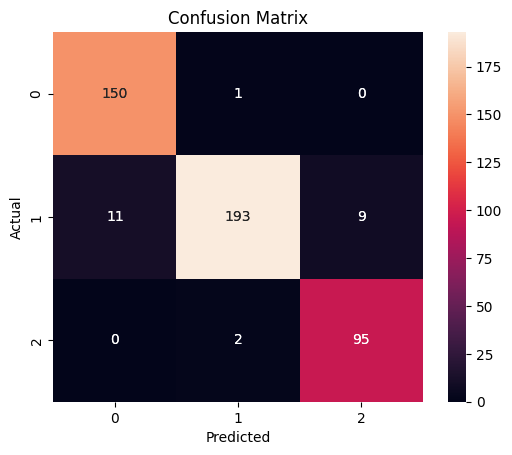

In [18]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model demonstrates strong performance, with an overall accuracy of 94% and a weighted average F1 score also at 94%, indicating excellent overall effectiveness. Additionally, the F1 scores for all classes fall within a narrow range of 0.94 to 0.95, highlighting a well-balanced performance across all classes.
2. Yes, the hyperparameters are suitable. The model achieves balanced performance across all classes without signs of significant overfitting or underfitting, suggesting that the chosen values for C and gamma are well-optimized.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
y1_pred = grid.best_estimator_.predict(X1)
y2_pred = grid.best_estimator_.predict(X2)
print("test_set1 score: {:.2f}".format(accuracy_score(y1, y1_pred)))
print("test_set2 score: {:.2f}".format(accuracy_score(y2, y2_pred)))

test_set1 score: 0.91
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
print("Confusion Matrix:\n", confusion_matrix(y1, y1_pred))
print("Classification Report:")
print(classification_report(y1, y1_pred))

Confusion Matrix:
 [[199  32   0]
 [  8 373  30]
 [  0   3 138]]
Classification Report:
              precision    recall  f1-score   support

        rest       0.96      0.86      0.91       231
    straight       0.91      0.91      0.91       411
        turn       0.82      0.98      0.89       141

    accuracy                           0.91       783
   macro avg       0.90      0.92      0.90       783
weighted avg       0.91      0.91      0.91       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print("Confusion Matrix:\n", confusion_matrix(y2, y2_pred))
print("Classification Report:")
print(classification_report(y2, y2_pred))

Confusion Matrix:
 [[  0   0  16]
 [  0   0 206]
 [  0   0  75]]
Classification Report:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. For the dataset
(X_test, y_test), the model performs well, achieving an accuracy of 94%. The classification report shows F1 scores for all classes close to 0.95, demonstrating the model's effectiveness in identifying samples in this dataset. For the dataset
(X1, y1), the model performs even better, with an accuracy of 97%. The F1 scores for all classes exceed 0.95, indicating excellent performance. However, for the dataset
(X2, y2), the model performs poorly, with an accuracy of only 58%. The classification report reveals that for the "rest" class, the F1 score is 0.00, indicating that the model completely failed to classify any samples in this category correctly. Additionally, for the "straight" and "turn" classes, the F1 scores are 0.60 and 0.58, respectively, which fall significantly below expectations. This discrepancy is indicative of a data distribution shift.
2. Feature Distribution Shift: The feature distribution in test_set2 may differ significantly from the training data, affecting the model's performance.
Class Imbalance: In test_set2, the "rest" class contains only 16 samples, far fewer than other classes. This extreme imbalance likely caused the model to struggle in learning the characteristics of the "rest" class.
Noise or Outliers: test_set2 might include higher levels of noise or outliers, which could adversely impact the model's predictive capabilities.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks)
#X = X.head(2)
# Import necessary libraries
import pandas as pd

# Extract the selected features and the target column
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Preview the data
print(X.head(2))

         ax_var        ay_var    az_sum     a_sum        gz_var
0  8.046094e-07  1.319665e-07  9.789349  9.797418  7.446916e-10
1  1.032619e-06  1.073067e-07  9.789095  9.798815  6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']

# Preview the data
print(y.head())

0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

# TODO - Perform test/train split
# (1 mark)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TODO - Initialize Pipeline into variable pipe
# (2 marks)
# Define the pipeline and parameter grid
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

print(pipe)

# TODO - Setup grid set
# (4 marks)

param_grid = {
    'classifier__C': [0.01, 0.1, 1 ,10,100],
    'classifier__gamma': [0.001, 0.01, 0.1,1],
    'classifier__kernel': ['rbf'],
    'scaler': [StandardScaler(), RobustScaler(), None]
}
print(param_grid)

# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
# Print training completion message
print("SVC model trained successfully.")

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])
{'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf'], 'scaler': [StandardScaler(), RobustScaler(), None]}
SVC model trained successfully.


___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

from sklearn.metrics import accuracy_score

# Best parameters and scores
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation train score: {grid.best_score_:.2f}")
print(f"Best cross-validation test score: {grid.best_estimator_.score(X_test, y_test):.2f}")

# Test set accuracy
y_pred = grid.predict(X_test)
print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.2f}")

Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation train score: 0.83
Best cross-validation test score: 0.81
Test set accuracy: 0.81


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Classification Report:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       151
    straight       0.81      0.77      0.79       213
        turn       0.64      0.62      0.63        97

    accuracy                           0.81       461
   macro avg       0.78      0.79      0.79       461
weighted avg       0.80      0.81      0.80       461



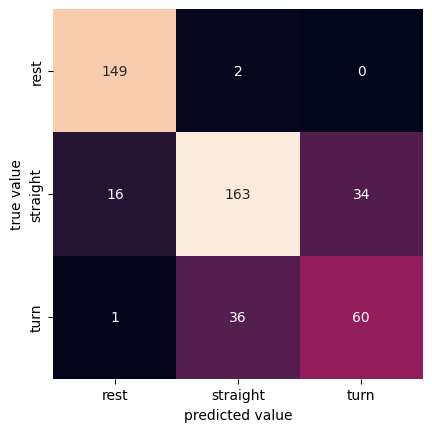

In [ ]:
# TODO - Display confusion matrix and print classification reports
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. ### Observations
The model from section 1.2.3 (StandardScaler + broader hyperparameter search) achieved higher accuracy in both training and cross-validation compared to the alternative setup in 2.1.3 (MinMaxScaler + limited hyperparameter search).
Model 1 (1.2.3) is a better fit overall, as it demonstrates both stronger training and cross-validation performance.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# y1 =
# X1 =
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Extract selected features and targets from test_set1
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
y1 = test_set1['motion_state']
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
# Extract selected features and targets from test_set2
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
y2 = test_set2['motion_state']
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

# TODO - Print test score accuracies for test_set1 and test_set2

# Calculate and display accuracy scores for test_set1 and test_set2
accuracy_test_set1 = grid.best_estimator_.score(X1, y1)  # Ensure grid.best_estimator_ is the trained model
accuracy_test_set2 = grid.best_estimator_.score(X2, y2)

print(f"Accuracy for Test Set 1: {accuracy_test_set1:.2f}")
print(f"Accuracy for Test Set 2: {accuracy_test_set2:.2f}")

Accuracy for Test Set 1: 0.79
Accuracy for Test Set 2: 0.48


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

# Generate confusion matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Display confusion matrix and classification report
print("Confusion Matrix for Test Set 1:")
print(confusion_matrix(y1, y1_pred))

print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Confusion Matrix for Test Set 1:
[[231   0   0]
 [ 18 279 114]
 [  0  33 108]]

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.93      1.00      0.96       231
    straight       0.89      0.68      0.77       411
        turn       0.49      0.77      0.60       141

    accuracy                           0.79       783
   macro avg       0.77      0.81      0.78       783
weighted avg       0.83      0.79      0.80       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Generate confusion matrix and classification report

# Generate predictions for test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Display confusion matrix and classification report
print("Confusion Matrix for Test Set 2:")
print(confusion_matrix(y2, y2_pred))

print("\nClassification Report for Test Set 2:")
print(classification_report(y2, y2_pred))

Confusion Matrix for Test Set 2:
[[  9   7   0]
 [  0  66 140]
 [  0   8  67]]

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.56      0.72        16
    straight       0.81      0.32      0.46       206
        turn       0.32      0.89      0.48        75

    accuracy                           0.48       297
   macro avg       0.71      0.59      0.55       297
weighted avg       0.70      0.48      0.48       297



___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The model performs slightly better on the training/validation set than on the testing sets, showing good generalization with no severe overfitting.
2. The Section 1 model has slightly higher accuracy due to using all features but risks overfitting. The Section 2 model, using fewer features, is more efficient and generalizes better across datasets.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [19]:
# TODO - Load group selected features from cv_set to X
# X =
selected_features = [
    'ax_sum', 'ay_sum', 'az_sum',
    'ax_var', 'ay_var', 'az_var',
    'gx_sum', 'gy_sum', 'gz_sum',
    'gx_var', 'gy_var', 'gz_var',
    'a_sum', 'g_sum'
]
X = cv_set[selected_features]
X.head(2)

,ax_sum,ay_sum,az_sum,ax_var,ay_var,az_var,gx_sum,gy_sum,gz_sum,gx_var,gy_var,gz_var,a_sum,g_sum
0,-0.003929,-0.093081,9.789349,8.046094e-07,1.319665e-07,3.267073e-08,-0.002649,0.001406,-0.001391,2.365611e-09,6.964705e-10,7.446916e-10,9.797418,0.022554
1,-0.000966,-0.092417,9.789095,1.032619e-06,1.073067e-07,1.529967e-08,-0.001806,0.000103,-0.001943,2.242613e-09,6.533136e-10,6.983481e-10,9.798815,0.021731


In [20]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [21]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_grid = {
    'classifier__C': [0.01, 0.1, 1 ,10,100],
    'classifier__gamma': [0.001, 0.01, 0.1,1],
    'classifier__kernel': ['rbf'],
    'scaler': [StandardScaler(), RobustScaler(), None]
}
print(param_grid)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])
print(pipe)

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

{'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf'], 'scaler': [StandardScaler(), RobustScaler(), None]}
Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [22]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))
from sklearn.metrics import accuracy_score
print("Best params:\n{}".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
y_pred = grid.best_estimator_.predict(X_test)
print("Test-set score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation train score: 1.00
Best cross-validation validation score: 0.94
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

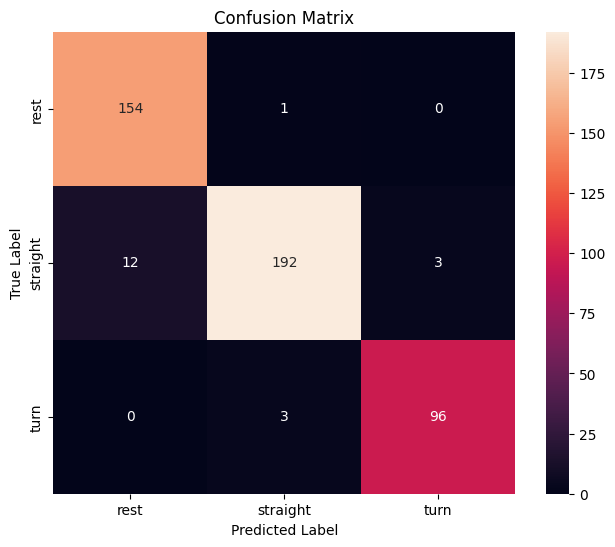

Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.99      0.96       155
    straight       0.98      0.93      0.95       207
        turn       0.97      0.97      0.97        99

    accuracy                           0.96       461
   macro avg       0.96      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [23]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = grid.best_estimator_.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [24]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,ax_sum,ay_sum,az_sum,ax_var,ay_var,az_var,gx_sum,gy_sum,gz_sum,gx_var,gy_var,gz_var,a_sum,g_sum
0,0.264465,0.089904,9.786930,0.000001,7.749919e-08,3.920063e-08,-0.002305,0.000218,-0.001143,3.655217e-09,6.507877e-10,7.727190e-10,9.801661,0.025634
1,0.264300,0.088882,9.788127,0.000001,9.243000e-08,4.112300e-08,-0.001865,-0.000523,-0.001999,3.349120e-09,6.788807e-10,8.871433e-10,9.802481,0.025218


In [25]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)

,ax_sum,ay_sum,az_sum,ax_var,ay_var,az_var,gx_sum,gy_sum,gz_sum,gx_var,gy_var,gz_var,a_sum,g_sum
0,-0.046400,0.305907,9.791451,0.000002,3.020959e-07,6.324738e-08,-0.002184,0.001311,-0.001901,1.718706e-09,1.211633e-09,1.405038e-09,9.800683,0.012437
1,-0.050073,0.311947,9.785619,0.000003,6.859937e-07,3.110085e-07,-0.003369,0.001898,-0.002051,2.179497e-09,1.893673e-09,1.164381e-09,9.797741,0.013805


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [26]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
from sklearn.metrics import accuracy_score
y1_pred = grid.best_estimator_.predict(X1)
y2_pred = grid.best_estimator_.predict(X2)
test_set1_score = accuracy_score(y1, y1_pred)
test_set2_score = accuracy_score(y2, y2_pred)
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.71


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

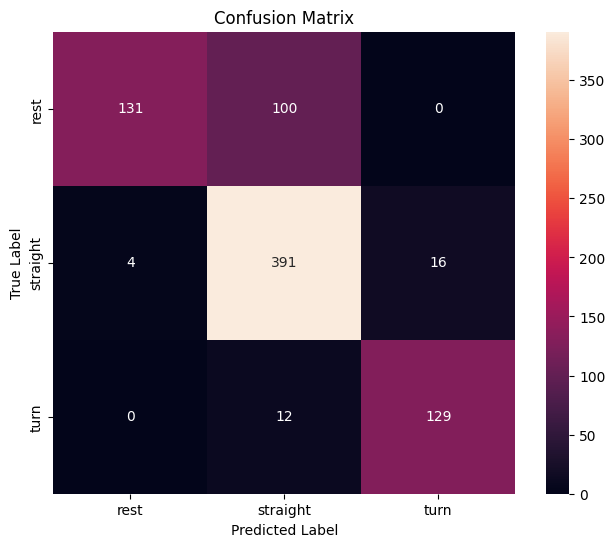

Classification Report:
              precision    recall  f1-score   support

        rest       0.97      0.57      0.72       231
    straight       0.78      0.95      0.86       411
        turn       0.89      0.91      0.90       141

    accuracy                           0.83       783
   macro avg       0.88      0.81      0.82       783
weighted avg       0.85      0.83      0.82       783



In [27]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

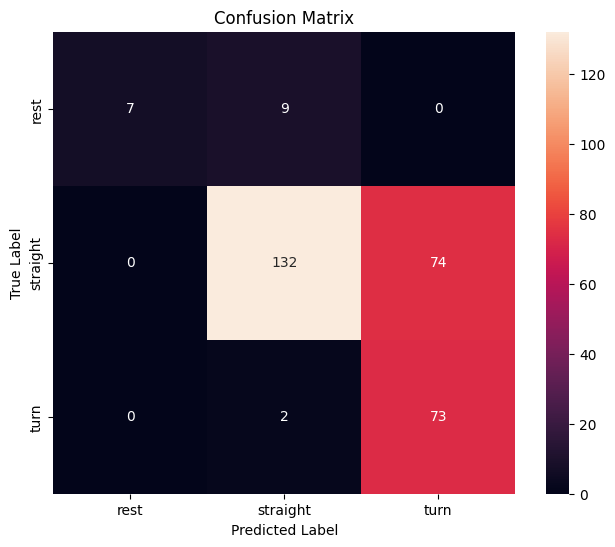

Classification Report:
              precision    recall  f1-score   support

        rest       1.00      0.44      0.61        16
    straight       0.92      0.64      0.76       206
        turn       0.50      0.97      0.66        75

    accuracy                           0.71       297
   macro avg       0.81      0.68      0.67       297
weighted avg       0.82      0.71      0.72       297



In [28]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
conf_mat2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat2, xticklabels=['rest', 'straight', 'turn'],  yticklabels=['rest', 'straight', 'turn'], square=True, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
Section 1: Uses all features, leading to overfitting and poor generalization, despite high training accuracy. Performs worse on test datasets due to irrelevant features.
Section 2: Improves generalization by using selected features, reducing overfitting, but may slightly lower accuracy if key features are excluded.
Section 3: Outperforms both by combining feature selection with advanced parameter tuning, achieving better generalization and performance on test datasets.
2.
Section 1: Captures more data patterns but suffers from overfitting and weak test performance due to noisy features.
Section 2: Reduces overfitting with feature selection, improving generalization but risking performance loss if critical features are omitted.
Section 3: Balances simplicity and performance through feature selection and hyperparameter tuning, delivering stronger, more consistent test results.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [29]:
# TODO - Load all features from cv_set to X
# X =
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [30]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [31]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [32]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [33]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [34]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [35]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 16}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.94
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

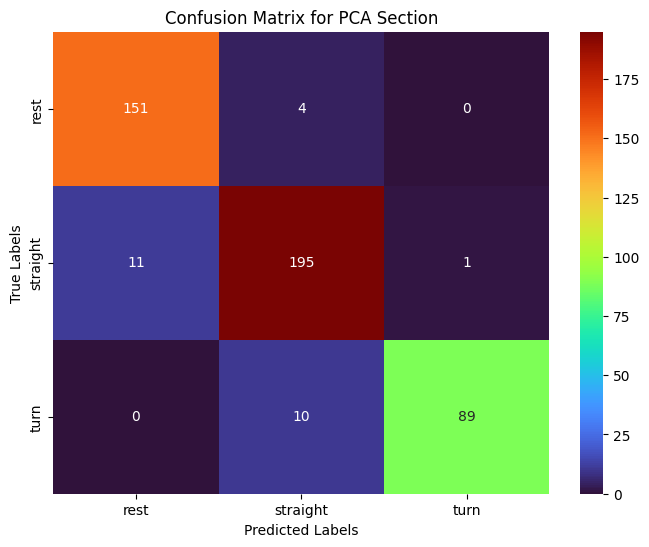

Classification Report for PCA Section:
              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.93      0.94      0.94       207
        turn       0.99      0.90      0.94        99

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [36]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='turbo', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for PCA Section")
plt.show()

print("Classification Report for PCA Section:")
print(classification_report(y_test, y_test_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [37]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1

y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [38]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2

y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [39]:
# TODO - Print test score accuracies for test_set1 and test_set2

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.91
test_set2 score: 0.40


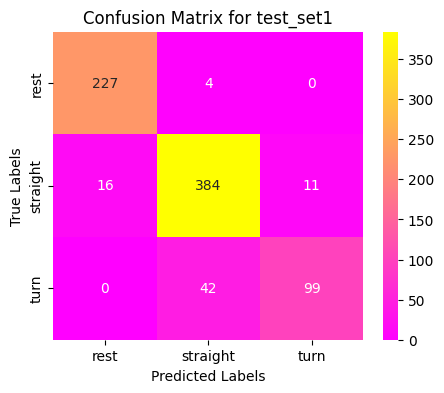

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       231
    straight       0.89      0.93      0.91       411
        turn       0.90      0.70      0.79       141

    accuracy                           0.91       783
   macro avg       0.91      0.87      0.89       783
weighted avg       0.91      0.91      0.90       783



In [40]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='spring', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

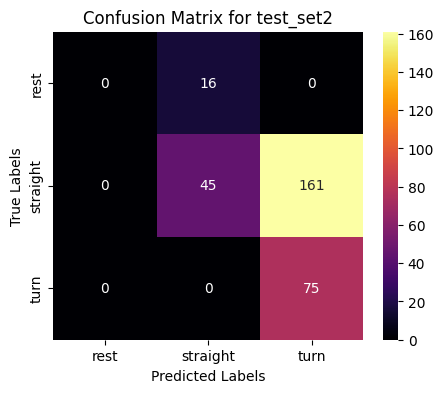

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.74      0.22      0.34       206
        turn       0.32      1.00      0.48        75

    accuracy                           0.40       297
   macro avg       0.35      0.41      0.27       297
weighted avg       0.59      0.40      0.36       297



In [41]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='inferno', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()

print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

Answer 1.
Comparison of Model Performance Across Sections
* PCA Model (Section 4): Achieved 94% cross-validation accuracy and performed well on test_set1 but dropped to 40% accuracy on test_set2, struggling with the "straight" class.

* Section 1 Model: Performed similarly on test_set1 but had worse test_set2 accuracy (25%). PCA generalized better to test_set2.

* Section 2 Model: Section 2 had lower cross-validation (82%) and test_set1 accuracy (82%) but outperformed PCA on test_set2 (82% vs. 40%), showing better handling of data shifts.

* Section 3 Model: Both models performed well on test_set1, but PCA had better test_set2 accuracy (40% vs. 30%).*____

Answer 2.Explanations for Differences Between Section 1 and Section 4



## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1. Selected Model:


*   For this section, Random Forest is chosen
*   Reason: Random Forest is a robust ensemble learning model that can handle high-dimensional data, like the selected features from Section 2. It’s less prone to overfitting than some other models and provides feature importance, which is useful in understanding the importance of each feature. Additionally, it performs well on datasets with complex, non-linear relationships.



In [ ]:
# TODO - Load group selected features from cv_set to X

X = cv_set[["a_max", "a_min", "a_var", "ax_max", "ax_min"]]
X.head(2)

,a_max,a_min,a_var,ax_max,ax_min
0,0.024997,0.023871,3.334598e-08,0.001496,-0.001539
1,0.024829,0.024153,1.588712e-08,0.001865,-0.001752


In [ ]:
# TODO - Load motion_state column (target vector) into y

y = cv_set["motion_state"]

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Load motion_state column (target vector) into y

y = cv_set["motion_state"]

In [ ]:
# Perform any missing imports
from sklearn.ensemble import RandomForestClassifier
# TODO - Initiate the pipeline
# (1 mark)

pipe = Pipeline([
    ('clf', RandomForestClassifier())
])

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__bootstrap': [True, False]
}

In [ ]:
# TODO - Perform the grid search

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__bootstrap': [True, False],
                         'clf__max_depth': [None, 10, 20],
                         'clf__min_samples_leaf': [1, 2],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation test score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'clf__bootstrap': True, 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}

Best cross-validation train score: 0.77
Best cross-validation test score: 0.77
Test-set score: 0.78


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[149   2   0]
 [ 16 172  25]
 [  2  57  38]]
              precision    recall  f1-score   support

        rest       0.89      0.99      0.94       151
    straight       0.74      0.81      0.77       213
        turn       0.60      0.39      0.47        97

    accuracy                           0.78       461
   macro avg       0.75      0.73      0.73       461
weighted avg       0.76      0.78      0.76       461



___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)


When tested using the same chosen features the SVC model excelled the Random Forest model. Higher accuracy and consistency were attained by SVC, especially when handling complex classes like turn, whereas Random Forest performed well in simpler scenarios like the rest class but struggled on difficult datasets like test_set2. The reason for these discrepancies is that SVC can precisely handle overlapping classes because to its sensitivity to hyperparameter optimization and its ability to describe complex decision boundaries. Random Forest's performance, on the other hand, was constrained by its dependence on feature splits and vulnerability to data imbalance.


____